# Simple Linear Regression using Python Scikit Learn
To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

# Importing all libraries 

In [90]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
%matplotlib inline

# Importing the Data

In [91]:
df = pd.read_csv(r'C:\Users\kumari\Desktop\GRIP\hours.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# To check the null values

In [93]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

# Plot to find the relationship in the data

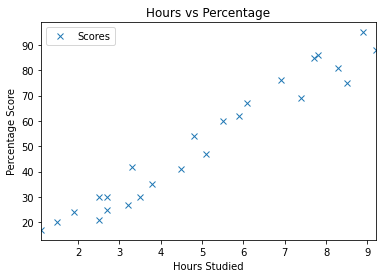

In [94]:
df.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data into X and y

In [95]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Splitting the data as 80% as train data & 20% as test data 

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the regression line for the test data

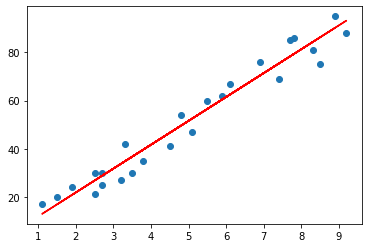

In [98]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red');
plt.show()

# Retrieving intercept and slope

In [99]:
regressor.intercept_

2.018160041434683

In [100]:
regressor.coef_

array([9.91065648])

# Making Predictions

In [101]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [102]:
print(y_test)

[20 27 69 30 62]


In [103]:
y_pred = regressor.predict(X_test)

In [104]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Plotting the bar graph to see actual and predicted values

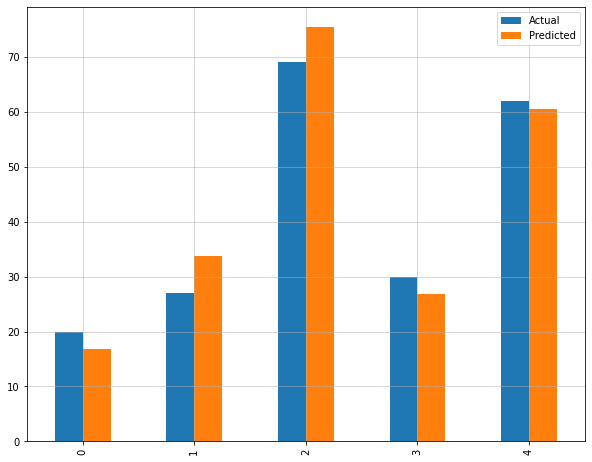

In [105]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='-', linewidth='0.5')
plt.show()

# We can see how close the predictions are to the actual output. Now, plot it as a straight line.

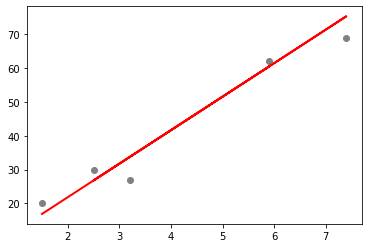

In [106]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line will indicate that the algorithm is correct.

# Testing the data for given hour

From the given question predicting the score for 9.25hrs

In [107]:
n = float(input())
hours = np.array([n])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.5
No of Hours = [[9.5]]
Predicted Score = 96.16939660753593


# Evaluating the model

Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [108]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
